# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [1]:
import pandas as pd
import numpy as np
iris_df = pd.read_csv("iris.csv")
iris_sample = iris_df.sample(10)

In [2]:
# Sample rows from iris dataset
iris_sample

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
32,33,5.2,4.1,1.5,0.1,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
49,50,5.0,3.3,1.4,0.2,Iris-setosa
36,37,5.5,3.5,1.3,0.2,Iris-setosa
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
17,18,5.1,3.5,1.4,0.3,Iris-setosa
106,107,4.9,2.5,4.5,1.7,Iris-virginica
68,69,6.2,2.2,4.5,1.5,Iris-versicolor


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Fill missing values with median of that particular column

In [4]:
#Fill missing values with median
iris_df["SepalLengthCm"]= iris_df["SepalLengthCm"].fillna(iris_df["SepalLengthCm"].median())
iris_df["SepalWidthCm"]= iris_df["SepalWidthCm"].fillna(iris_df["SepalWidthCm"].median())
iris_df["PetalLengthCm"]= iris_df["PetalLengthCm"].fillna(iris_df["PetalLengthCm"].median())
iris_df["PetalWidthCm"]= iris_df["PetalWidthCm"].fillna(iris_df["PetalWidthCm"].median())

In [5]:
#After treating missing value checking the columns
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [6]:
from sklearn import preprocessing

In [7]:
#Changing species column to numeric
le = preprocessing.LabelEncoder()
iris_df["Species"] = le.fit_transform(iris_df["Species"])

In [8]:
iris_df["Species"].value_counts()

2    52
1    50
0    50
Name: Species, dtype: int64

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [9]:
iris_features = iris_df.drop(["Species"],axis=1)

In [10]:
iris_target = iris_df["Species"]

In [11]:
#computing Correlation between features and target
iris_features.corrwith(iris_target,axis=0)

Id               0.942753
SepalLengthCm    0.775061
SepalWidthCm    -0.417318
PetalLengthCm    0.944477
PetalWidthCm     0.952513
dtype: float64

In [12]:
#Dropping SepalWidth column from features as it has less corr
iris_features = iris_features.drop(["SepalWidthCm"],axis=1)

In [13]:
iris_features

,Id,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,1.40,0.2
1,2,4.9,1.40,0.2
2,3,4.7,1.30,0.2
3,4,4.6,1.50,0.2
4,5,5.0,1.40,0.2
5,6,5.4,1.70,0.4
6,7,4.6,1.40,0.3
7,8,5.0,1.50,0.2
8,9,4.4,1.40,0.2
9,10,4.9,1.50,0.1


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [14]:
iris_features.var(axis=0)

Id               1938.000000
SepalLengthCm       0.676645
PetalLengthCm       3.076516
PetalWidthCm        0.577141
dtype: float64

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

In [15]:
scatter_plot = pd.plotting.scatter_matrix(iris_features)

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size=0.20)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [17]:
#Read the dataset
df_bc = pd.read_csv("bc2.csv")

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [18]:
#finding out datatypes for each of the column
df_bc.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [19]:
#Derving no. of records and missing values
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [20]:
df_bc.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [21]:
#checking missing values
df_bc.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [22]:
# count number of rows where Bare Nuclei has "?"
df1_bc = df_bc.loc[df_bc["Bare Nuclei"] =="?"].count()
df1_bc

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [23]:
df_bc.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [24]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [25]:
# finding the frequency distribution for Bare Nuclei
df_bc["Bare Nuclei"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [26]:
df_bc["Bare Nuclei"].replace(to_replace ="?", 
                 value =1,inplace = True)

In [27]:
# count number of rows where Bare Nuclei has "?"
df1_bc = df_bc.loc[df_bc["Bare Nuclei"] =="?"].count()
df1_bc

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 5
#### Find the distribution of target variable (Class) 

In [28]:
df_bc["Class"].value_counts()


2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE7D12C470>]],
      dtype=object)

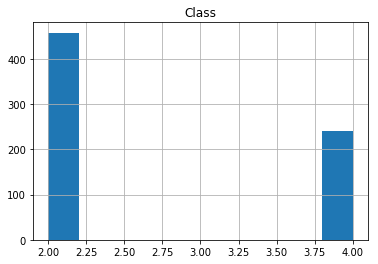

In [29]:
#Plot the distribution of target variable
import matplotlib.pyplot as plt
df_bc.hist(column = "Class")

#### Convert the datatype of Bare Nuclei to `int`

In [30]:
df_bc["Bare Nuclei"] = df_bc["Bare Nuclei"].astype(int)
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

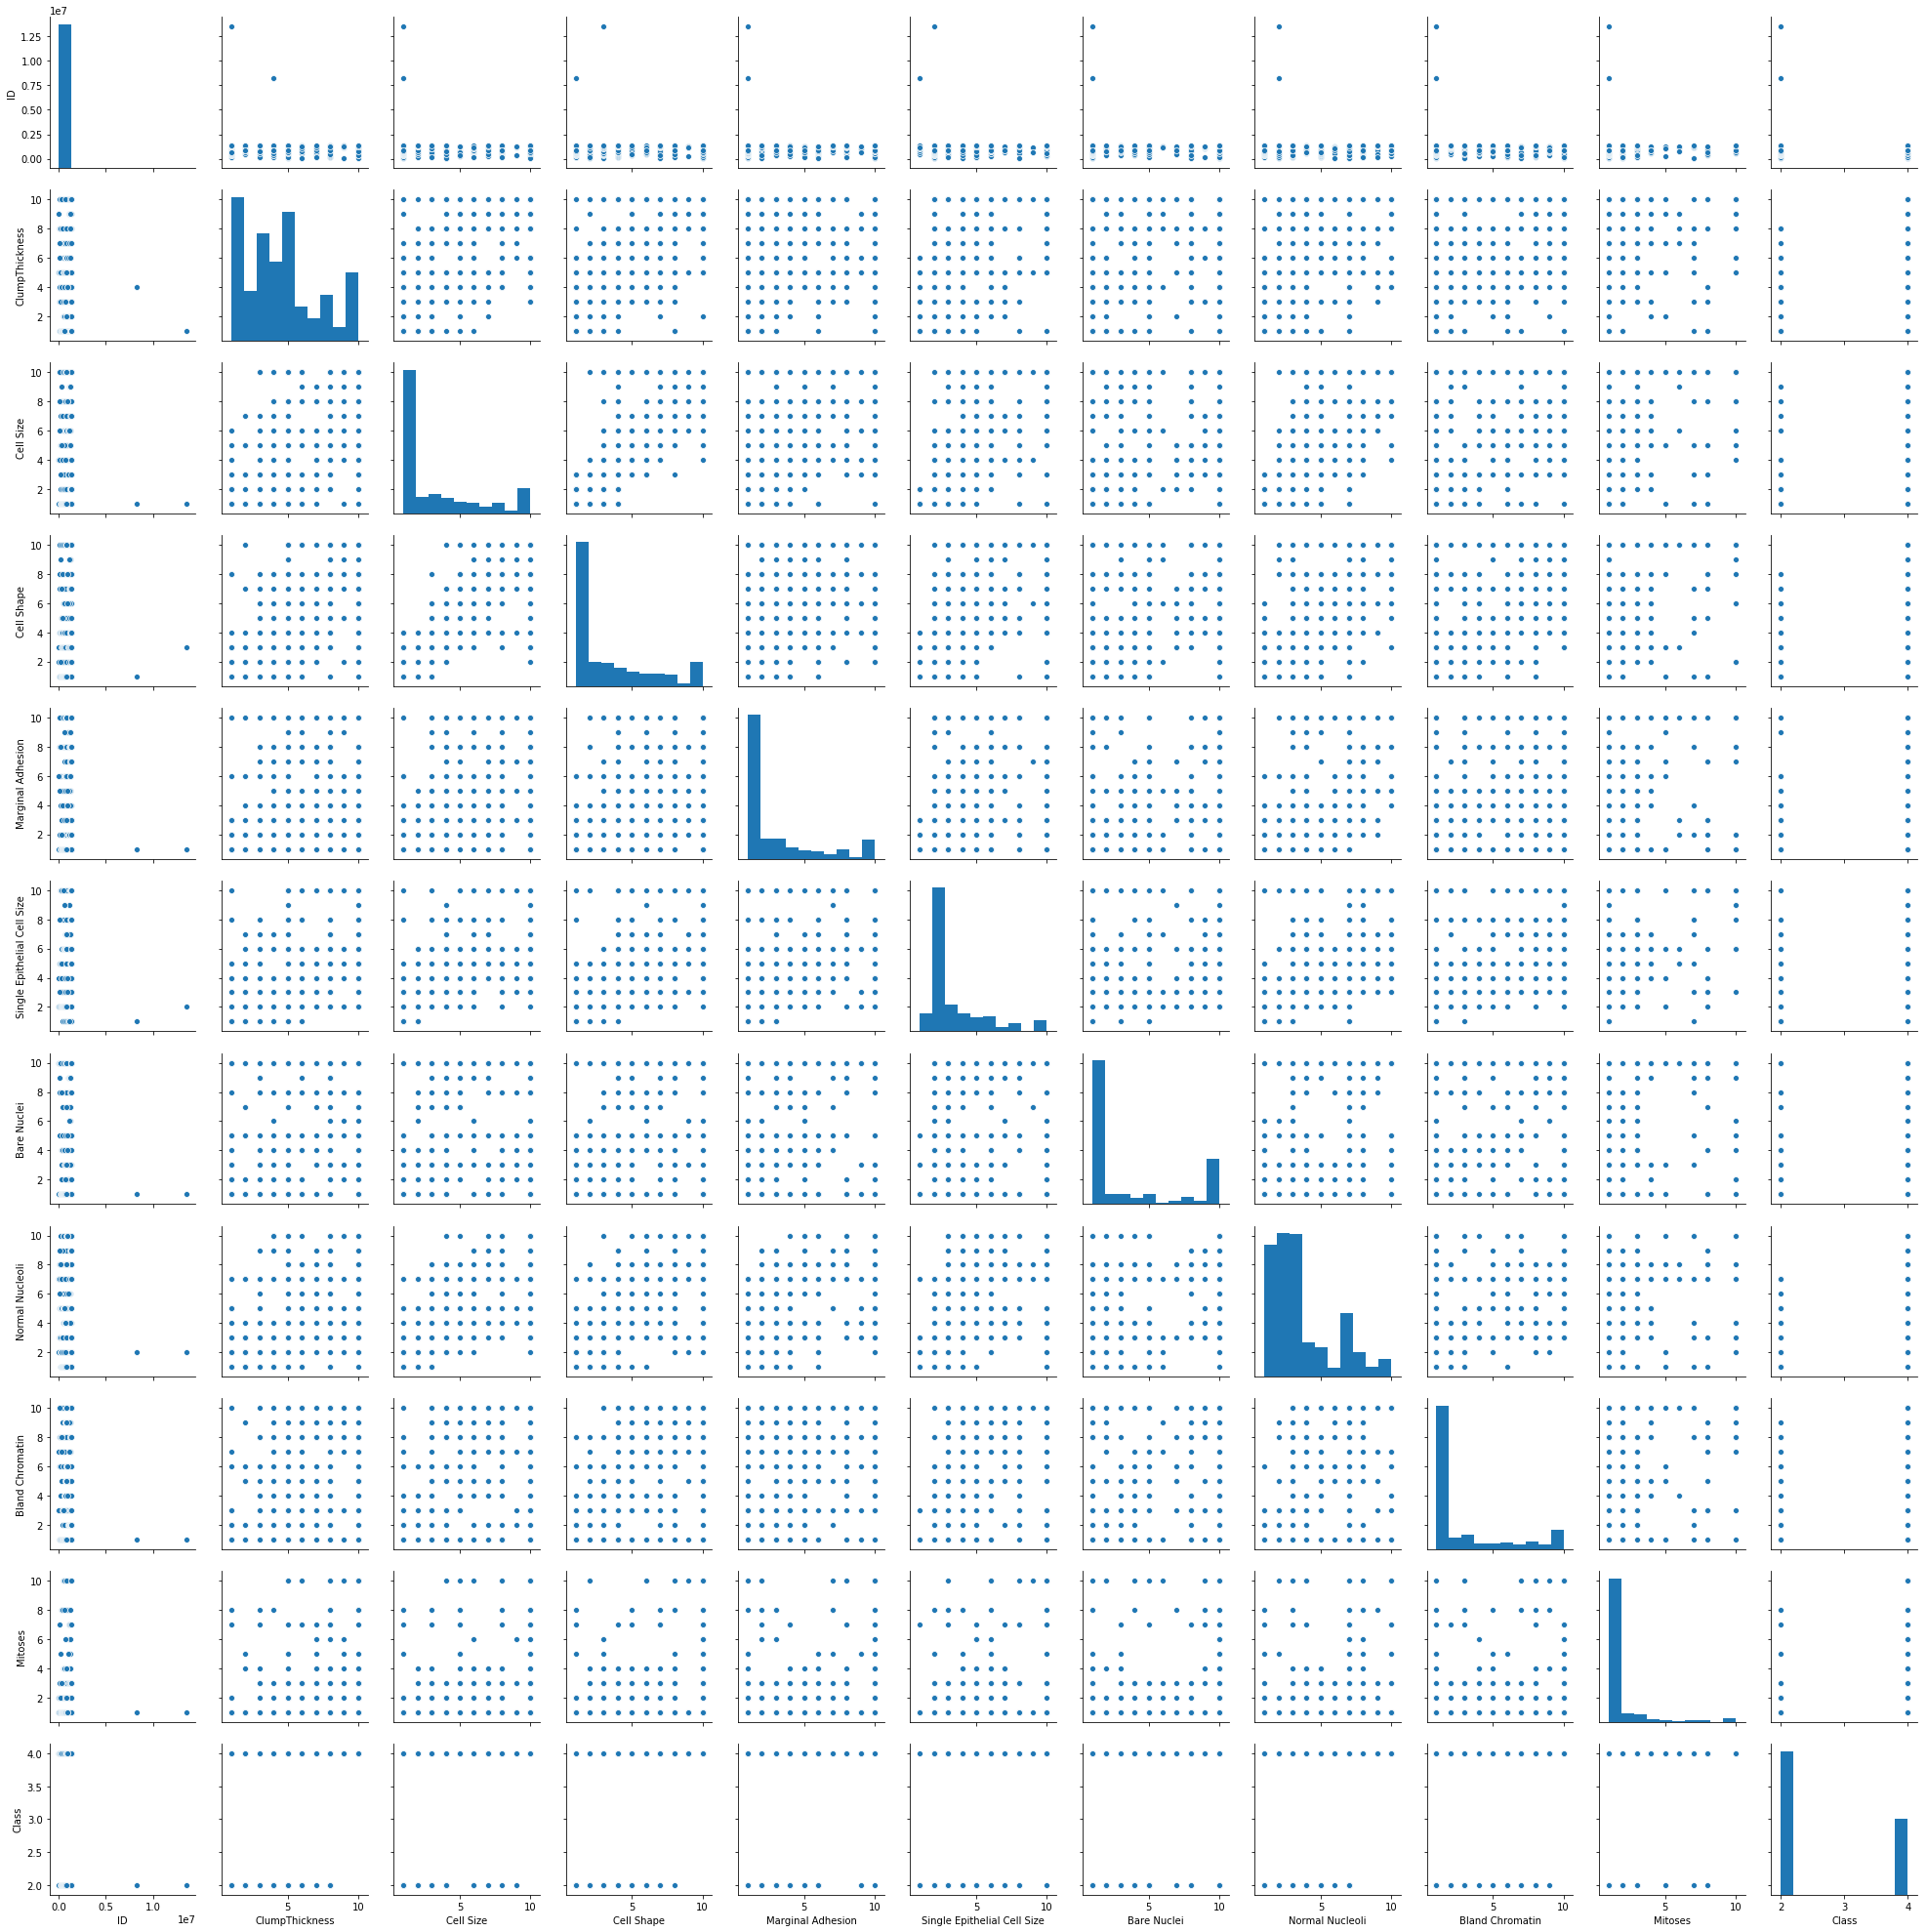

In [31]:
import seaborn as sns
sns.pairplot(data = df_bc,kind ="scatter")

In [32]:
df_corr = df_bc.corr()
df_corr

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


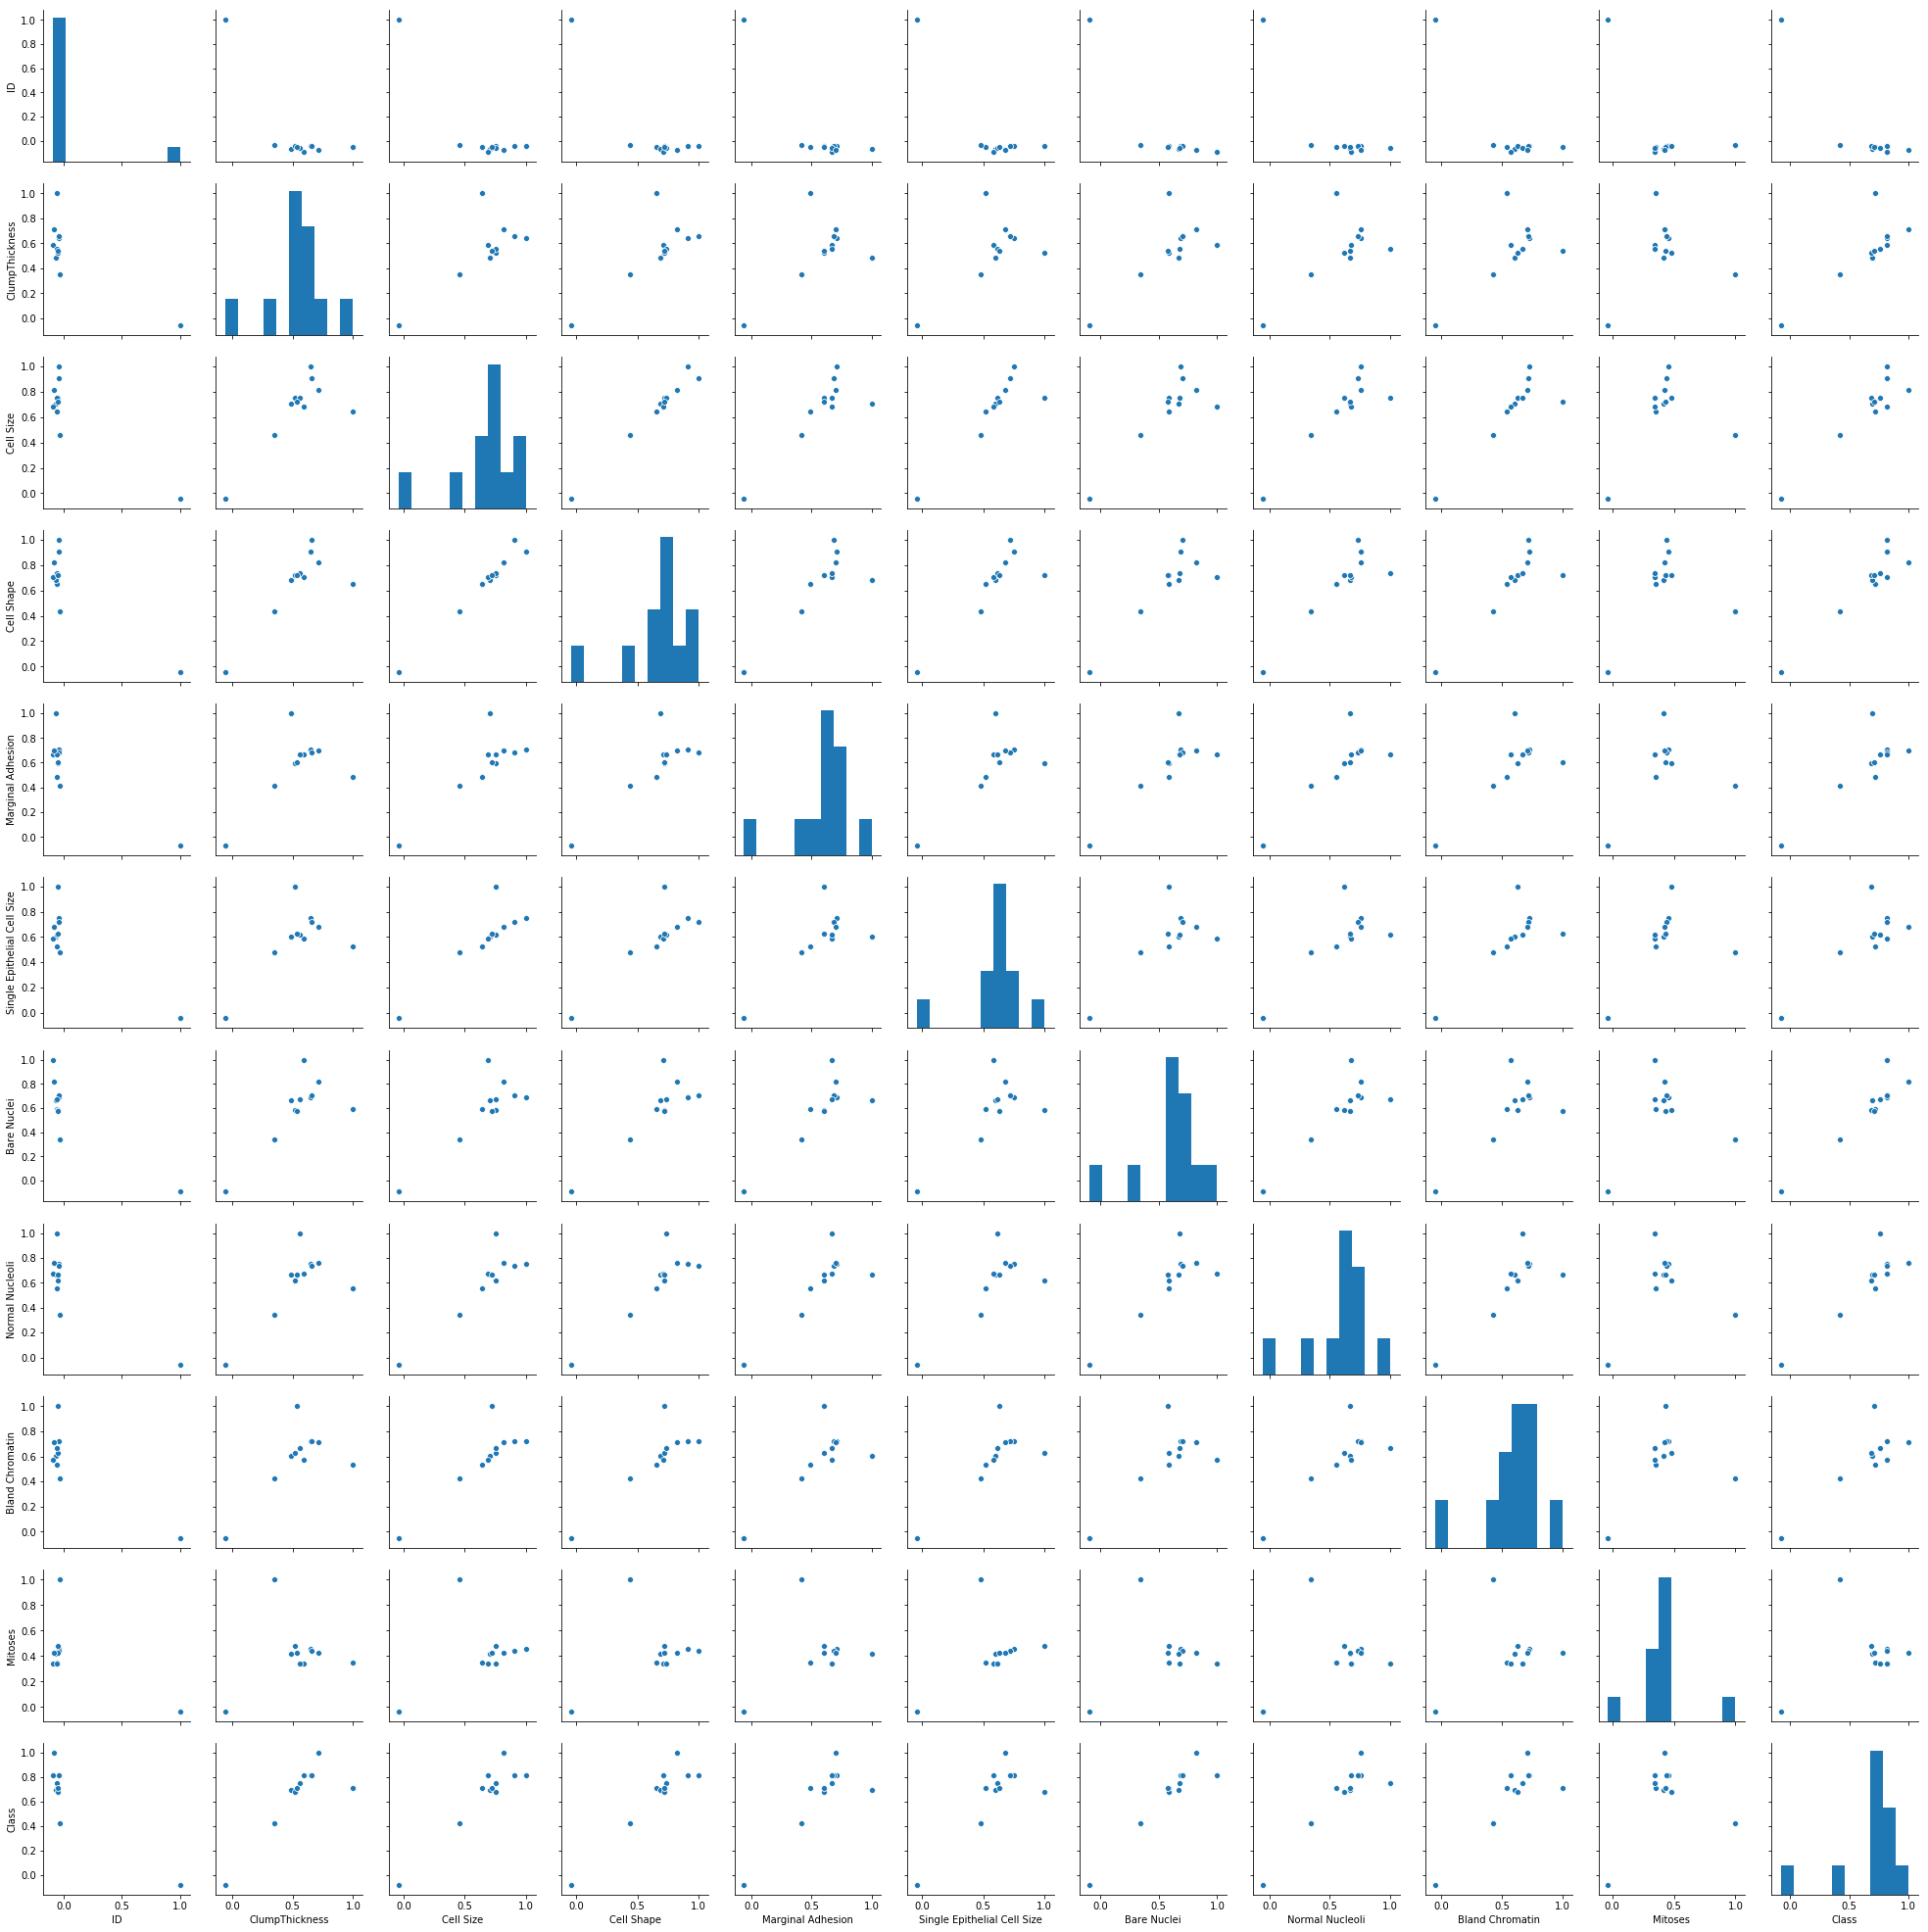

In [33]:
import seaborn as sns
sns.pairplot(data = df_corr,kind ="scatter")

In [34]:
df_bc.drop(["ID"],axis=1,inplace=True)

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [37]:
df_bc.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [60]:
X= df_bc.drop(["Class"],axis=1)
X.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')

In [64]:
y = df_bc["Class"]

#### Divide the Training and Test sets in 70:30 

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [91]:
#Standarddize the data
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaysh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  
C:\Users\jaysh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  import sys


## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [88]:
train_accuracy = {}
test_accuracy = {}
k_list = [3,5,9]
for k in k_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
    sc=StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)
   
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
   
    train_accuracy[k] = knn.score(X_train_scaled,y_train)
    test_accuracy[k] = knn.score(X_test_scaled,y_test)
    print("K= {}, Traning Accuracy: {}, Test Accuracy: {}".format(k, knn.score(X_train_scaled,y_train),
                                                                  knn.score(X_test_scaled,y_test)))

K= 3, Traning Accuracy: 0.9785330948121646, Test Accuracy: 0.9571428571428572
K= 5, Traning Accuracy: 0.9713774597495528, Test Accuracy: 0.9642857142857143
K= 9, Traning Accuracy: 0.9677996422182469, Test Accuracy: 0.9571428571428572


C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jaysh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler

## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [89]:

train_accuracy_plot = []
test_accuracy_plot = []
neighbors = []
for k in range(1,20):
    if k%2 !=0:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
        sc=StandardScaler()
        X_train_scaled = sc.fit_transform(X_train)
        X_test_scaled = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled,y_train)
       
        train_accuracy[k] = knn.score(X_train_scaled,y_train)
        test_accuracy[k] = knn.score(X_test_scaled,y_test)
        print("K= {}, Traning Accuracy: {}, Test Accuracy: {}".format(k, knn.score(X_train_scaled,y_train),
                                                                  knn.score(X_test_scaled,y_test)))
        #Add to list
        #Compute accuracy on the training set
        train_accuracy_plot.insert(k, knn.score(X_train_scaled,y_train))
        #Compute accuracy on the testing set
        test_accuracy_plot.insert(k,knn.score(X_test_scaled,y_test))
        neighbors.append(k)

Optimal_k = sorted(test_accuracy.items(), key=lambda kv: kv[1], reverse=True)
print("Optimal Value of K: {}".format(Optimal_k[0][0]))


C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jaysh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, i

K= 1, Traning Accuracy: 1.0, Test Accuracy: 0.9428571428571428
K= 3, Traning Accuracy: 0.9785330948121646, Test Accuracy: 0.9571428571428572
K= 5, Traning Accuracy: 0.9713774597495528, Test Accuracy: 0.9642857142857143


C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jaysh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, i

K= 7, Traning Accuracy: 0.9695885509838998, Test Accuracy: 0.9571428571428572
K= 9, Traning Accuracy: 0.9677996422182469, Test Accuracy: 0.9571428571428572
K= 11, Traning Accuracy: 0.9660107334525939, Test Accuracy: 0.9571428571428572
K= 13, Traning Accuracy: 0.964221824686941, Test Accuracy: 0.9571428571428572

C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jaysh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, i


K= 15, Traning Accuracy: 0.964221824686941, Test Accuracy: 0.9571428571428572
K= 17, Traning Accuracy: 0.962432915921288, Test Accuracy: 0.9571428571428572
K= 19, Traning Accuracy: 0.964221824686941, Test Accuracy: 0.9571428571428572
Optimal Value of K: 5


C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaysh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jaysh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

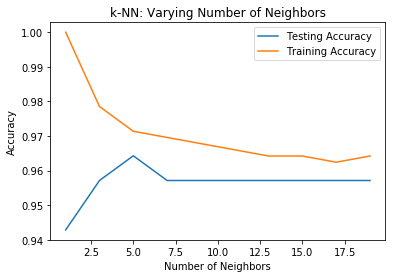

In [90]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()